<a href="https://colab.research.google.com/github/henriqlustosa/Aulas_MBA_Mackenzie/blob/main/PL_A1_Henrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação do Projeto
---



O **objetivo** desse exercício é demonstrar a **Lei de Zipf** através de um conjunto de dados obtidos na web - uma página da Wikipedia. E permitir a replicação deste exercício através do Google Colab.

O conjunto de dados foi obtido através de **Web Scrapping** de uma forma que pode ser replicado em outros sites.

A Lei de Zipf é uma lei empírica, que foi proposta por George Kingsley Zipf, um linguista americano.

De acordo com a lei de Zipf, a frequência de uma determinada palavra depende do inverso de sua classificação. A lei de Zipf é uma das muitas leis importantes que desempenha um papel significativo no **processamento de linguagem natural**.

A palavra com a segunda classificação mais alta terá o valor de frequência $ \frac{1}{2}$  da primeira palavra, a palavra com a terceira classificação mais alta terá o valor de frequência $ \frac{1}{3}$ da primeira palavra e assim por diante.






# Modelo
---

Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia do guitarrista **John Mayer** encontrado no Wikipedia. 

1. A primeira célula obtém o texto da biografia do guitarrista na variável `texto`. Usando um pacote do wikipedia ou de uma forma genérica que pode ser replicada em outros sites.

2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf.

4. Conclusão.

5. Bibliografia.

# Aquisição dos Dados
---

In [ ]:
# Instalação do pacote wikipedia para acesso das páginas do conteúdo do Wikipedia de forma rápida e fácil
# pip install wikipedia 

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=6206ae336fdee3b603d1e86463a81047222cfe469ca6a9fe656dc5fcddfae58d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
# Importação do pacote wikipedia
import wikipedia
# O título de uma página específica do Wikipedia
wiki = wikipedia.page('John Mayer')
# Extração do contéudo da página especificada anteriormente
text = wiki.content
text

'John Clayton Mayer ( MAY-ər; born October 16, 1977) is an American singer, songwriter, and guitarist. Born and raised in Fairfield County, Connecticut, Mayer attended Berklee College of Music in Boston, but left   and moved to Atlanta in 1997 with Clay Cook. Together, they formed a short-lived two-man band called Lo-Fi Masters. After their split, Mayer continued to play local clubs, refining his skills and gaining a following. After his appearance at the 2001 South by Southwest Festival, he was signed to Aware Records, and eventually to Columbia Records, which released his first extended play Inside Wants Out. His following two studio albums—Room for Squares (2001) and Heavier Things (2003)—performed well commercially, achieving multi-platinum status. In 2003, he won the Grammy Award for Best Male Pop Vocal Performance for his single "Your Body Is a Wonderland".\nBy 2005, Mayer had moved away from the acoustic music that characterized his early records, and begun performing the blues 

In [22]:
# Extraindo os mesmos dados usando uma forma mais genérica para pode ser replicado para outros sites
# Importação dos pacotes
from urllib.request import urlopen
from bs4 import BeautifulSoup
# Específicado o endereço da página a ser buscada
source = urlopen('https://en.wikipedia.org/wiki/John_Mayer').read()
# Buscando todo o conteúdo html da página
soup = BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>John Mayer - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bddb0fea-cc40-4610-b510-dcf10ef883d2","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"John_Mayer","wgTitle":"John Mayer","wgCurRevisionId":1086583710,"wgRevisionId":1086583710,"wgArticleId":212187,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Webarchive template archiveis links","All articles with dead external links","Articles with dead external links from March 2015

In [23]:
# O comando soup contém toda a página e compreende em pequenos elementos, a maioria desses elementos não é importante para este projeto. Por exemplo: cite, footer etc.)

print(set([text.parent.name for text in soup.find_all(text=True)]))

{'body', 'title', 'h3', 'b', 'th', 'nav', 'code', 'q', 'span', 'li', 'script', 'footer', 'sup', 'ol', 'p', 'blockquote', 'dt', 'h2', 'div', 'html', 'form', 'label', 'i', 'abbr', 'h1', 'head', 'style', 'tr', 'table', 'tbody', 'small', '[document]', 'a', 'ul', 'td', 'cite'}


In [24]:
# No caso é a tag <p> - que significa parágrafo - que nos interessa 
# Extração do conteúdo dos parágrafos
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text
    
text

'\nJohn Clayton Mayer[1] (/ˈmeɪ.ər/ MAY-ər; born October 16, 1977) is an American singer, songwriter, and guitarist.[2] Born and raised in Fairfield County, Connecticut, Mayer attended Berklee College of Music in Boston, but left   and moved to Atlanta in 1997 with Clay Cook. Together, they formed a short-lived two-man band called Lo-Fi Masters. After their split, Mayer continued to play local clubs, refining his skills and gaining a following. After his appearance at the 2001 South by Southwest Festival, he was signed to Aware Records, and eventually to Columbia Records, which released his first extended play Inside Wants Out. His following two studio albums—Room for Squares (2001) and Heavier Things (2003)—performed well commercially, achieving multi-platinum status. In 2003, he won the Grammy Award for Best Male Pop Vocal Performance for his single "Your Body Is a Wonderland".\nBy 2005, Mayer had moved away from the acoustic music that characterized his early records, and begun perf

In [25]:
# Import pacote expressões regulares
import re
# Limpando o texto
text = re.sub(r'\[.*?\]+', '', text)
text = text.replace('\n', '')
text

'John Clayton Mayer (/ˈmeɪ.ər/ MAY-ər; born October 16, 1977) is an American singer, songwriter, and guitarist. Born and raised in Fairfield County, Connecticut, Mayer attended Berklee College of Music in Boston, but left   and moved to Atlanta in 1997 with Clay Cook. Together, they formed a short-lived two-man band called Lo-Fi Masters. After their split, Mayer continued to play local clubs, refining his skills and gaining a following. After his appearance at the 2001 South by Southwest Festival, he was signed to Aware Records, and eventually to Columbia Records, which released his first extended play Inside Wants Out. His following two studio albums—Room for Squares (2001) and Heavier Things (2003)—performed well commercially, achieving multi-platinum status. In 2003, he won the Grammy Award for Best Male Pop Vocal Performance for his single "Your Body Is a Wonderland".By 2005, Mayer had moved away from the acoustic music that characterized his early records, and begun performing the

In [93]:
# Buscando as palavras do texto seguindo a expressão regular:
# Aceita palavras que começam com letra maiúscula ou não e que contenham	no minimo 4 e no máximo 10 caracteres
words = re.findall(r'(\b[A-Za-z][a-z]{3,9}\b)', text)

# Construção do Dicionário
---

In [95]:
# Função para criar o dicionário de frequência de cada palavra
# Chave = palavra, Value = contagem da frequência

frequency = {}
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1


In [53]:
# Função para apresentação dos dados do dicionário de forma decrescente
# Utilizando o itemgetter para para selecionar o campo que ser

from operator import itemgetter 

for key, value in sorted(frequency.items(), key = itemgetter(1),reverse= True):
    print(key, value)



Mayer 190
with 112
that 87
album 58
from 43
released 41
John 33
guitar 30
music 29
song 27
Dead 21
were 21
began 20
tour 20
first 18
also 18
band 17
single 16
including 16
songs 16
they 15
which 15
Continuum 15
January 15
September 15
called 14
performed 14
release 14
said 14
about 14
studio 13
have 13
been 13
after 13
February 13
announced 13
years 12
number 12
more 11
concert 11
Rolling 11
December 11
show 11
June 11
made 11
their 10
early 10
received 10
Studies 10
vocal 10
Grateful 10
other 10
this 10
Billboard 10
along 10
interview 10
March 10
Music 9
Grammy 9
Best 9
blues 9
That 9
July 9
three 9
Company 9
since 9
became 9
time 9
included 9
Stone 9
limited 9
October 8
Aware 8
acoustic 8
live 8
World 8
Battle 8
media 8
career 8
while 8
guitars 8
track 8
chart 8
Show 8
version 8
episode 8
would 8
Late 8
signature 8
After 7
following 7
Vocal 7
musician 7
such 7
third 7
work 7
However 7
year 7
gave 7
Stevie 7
Vaughan 7
David 7
concerts 7
being 7
where 7
debuted 7
most 7
Angeles 7
each 

{'John': 33,
 'Clayton': 1,
 'Mayer': 190,
 'born': 3,
 'October': 8,
 'American': 3,
 'singer': 6,
 'songwriter': 6,
 'guitarist': 4,
 'Born': 6,
 'raised': 2,
 'Fairfield': 2,
 'County': 1,
 'attended': 2,
 'Berklee': 3,
 'College': 2,
 'Music': 9,
 'Boston': 1,
 'left': 4,
 'moved': 4,
 'Atlanta': 4,
 'with': 112,
 'Clay': 2,
 'Cook': 4,
 'Together': 1,
 'they': 15,
 'formed': 4,
 'short': 1,
 'lived': 1,
 'band': 17,
 'called': 14,
 'Masters': 2,
 'After': 7,
 'their': 10,
 'split': 1,
 'continued': 5,
 'play': 2,
 'local': 4,
 'clubs': 2,
 'refining': 1,
 'skills': 1,
 'gaining': 1,
 'following': 7,
 'appearance': 4,
 'South': 2,
 'Southwest': 2,
 'Festival': 6,
 'signed': 4,
 'Aware': 8,
 'Records': 6,
 'eventually': 2,
 'Columbia': 6,
 'which': 15,
 'released': 41,
 'first': 18,
 'extended': 2,
 'Inside': 3,
 'Wants': 3,
 'studio': 13,
 'albums': 3,
 'Room': 6,
 'Squares': 6,
 'Heavier': 4,
 'Things': 4,
 'performed': 14,
 'well': 6,
 'achieving': 1,
 'multi': 1,
 'platinum': 1,

In [ ]:
len(words)

4657

# Apresentação dos Dados
---

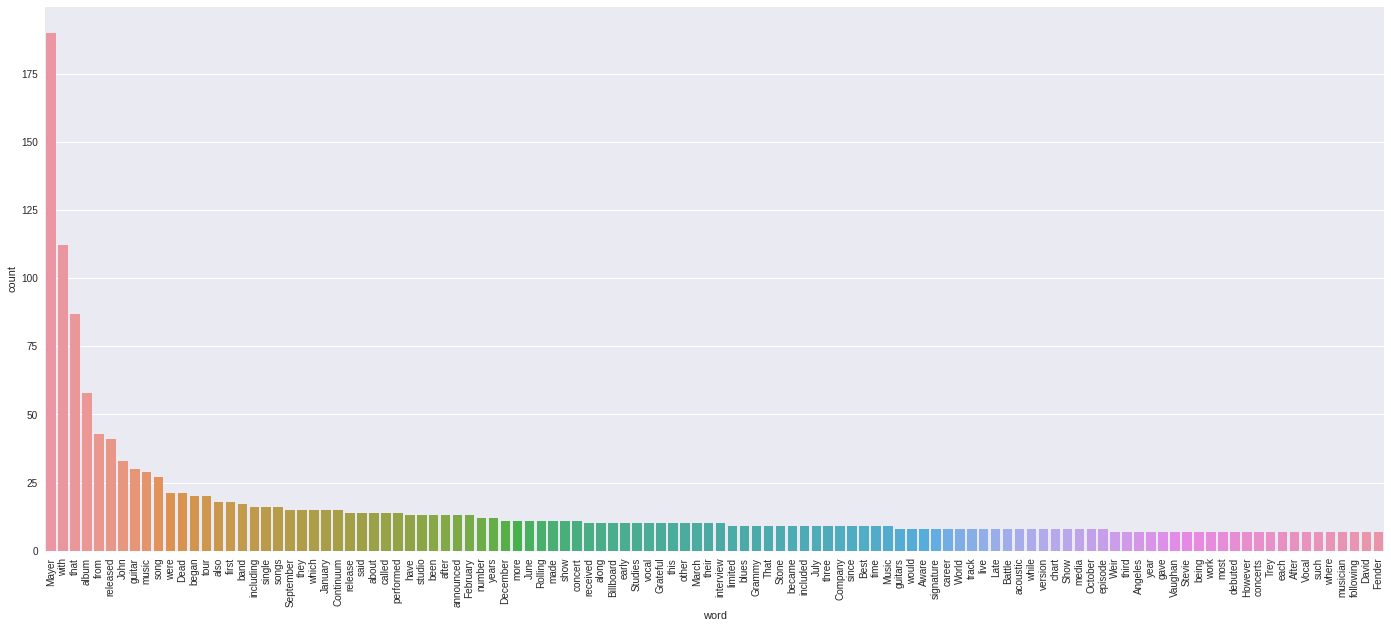

In [87]:
# Apresentação dos dados em forma de gráfico


import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zipf
df = pd.DataFrame(frequency.items(),  columns=['word', 'count']).sort_values('count',ascending=False)

df = df[df['count'] > 6] # somente termos com mais de 10 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 
plt.show()

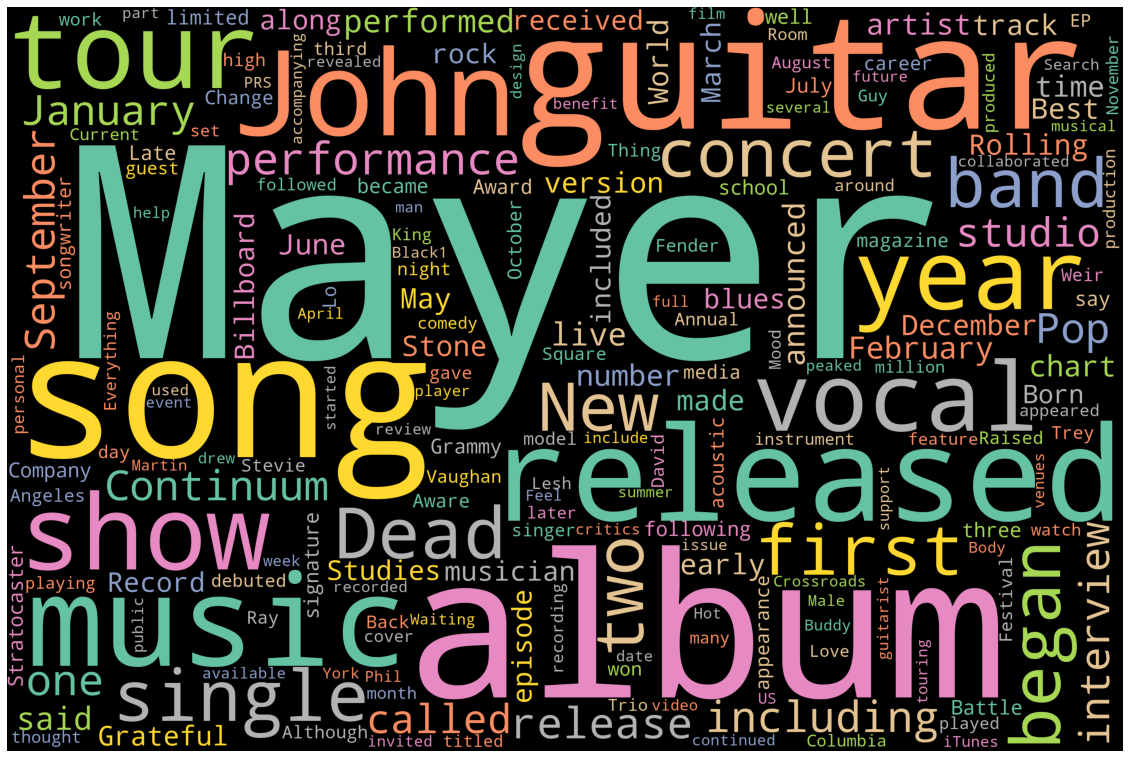

In [ ]:
# Apresentação das palavras mais frequentes no DataFrame
# Visualização dos dados no formato word cloud
# NB. word clouds não é um método científico, mas é uma apresentação que possui uma agradável visualização
# Cuidado ao rodar essa função com NLTK que possuem similares key words
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
# Notebooks permite rodar sobre muliplas linhas facilitando a leitura 
# Wordcloud também analisa dentro dos termos da contagem e remove as stopwords
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)

# Conclusão
---

Conclui-se que o gráfico se assemelha muito com mesmo obtido pela lei de Zipf, principalmente depois de tirar do documento palavras que são utilizadas como preposições, pronomes, etc. que não agregam valor semântico ao conteúdo do texto. Isso é verificado no segundo gráfico, que mostra palavras que remetem ao significado do texto. Demonstrando uma relação entre a frequência das palavras  e o texto em si de forma a assinalar o significado.

Individualmente, nem a sintaxe nem a semântica são suficientes para induzir uma distribuição Zipfiana por si só. No entanto, a sintaxe e a semântica trabalham juntas para uma distribuição Zipfian.


# Bibliografia
---

https://code.tutsplus.com/tutorials/how-to-use-python-to-find-the-zipf-distribution-of-a-text-file--cms-26502
https://levelup.gitconnected.com/two-simple-ways-to-scrape-text-from-wikipedia-in-python-9ce07426579b

https://www.kaggle.com/code/keithcooper/nlp-demonstration

https://www.techtarget.com/whatis/definition/Zipfs-Law#:~:text=Zipf's%20Law%20is%20a%20statistical,inversely%20proportional%20to%20their%20ranks.